#### QUESTION:

Given an aerial image of a city as Satellite_image.jpg and the corresponding output expected is given as Satellite_image_mask.jpg. Apply necessary image preprocessing techniques to highlight the roads in the given satellite image and extract your predicted masks. Compare the predicted and the actual masks using appropriate performance metrics and write your inference. How can you further improve the precise segmentation of the roads.

`Import the required libraries`

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from math import log10, sqrt
import cv2

`Function to display the images`

In [71]:
def display(img,name):
    plt.title(name)
    plt.imshow(img,cmap='gray') 
    plt.axis('off')

`Read the image`

In [72]:
input_img = cv2.imread('Image.png')
input_img = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

output_img = cv2.imread('Image_mask.png')
output_img = cv2.cvtColor(output_img, cv2.COLOR_RGB2GRAY)

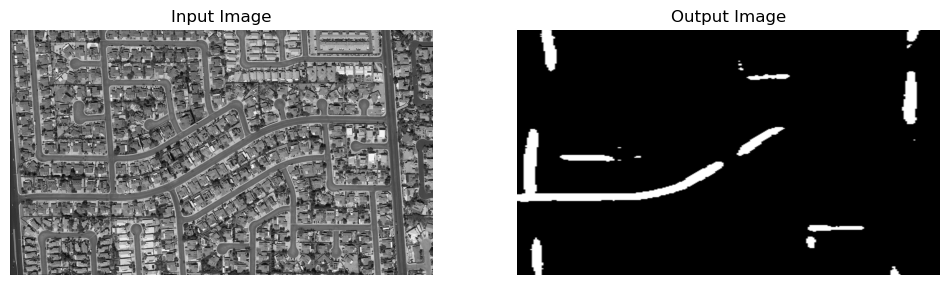

In [73]:
plt.figure(figsize=(12,10))
plt.subplot(121), display(input_img,'Input Image')
plt.subplot(122), display(output_img,'Output Image')
plt.show()

`Image Preprocessing Techniques`

- Gaussian Blur
- Canny Edge DEtection
- Dilation
- Erosion (did not use)
- Morphology
- Bitwise Not
- Median Blur
- Thresholding
- Connected Components Processing

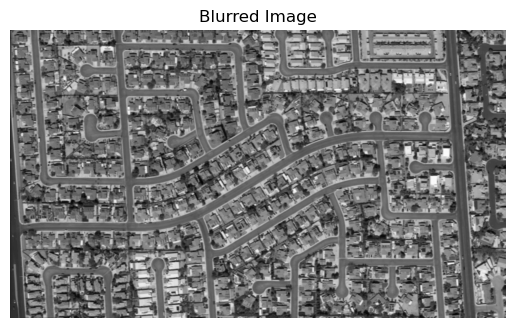

In [223]:
blur = cv2.GaussianBlur(input_img, (7,5), 0)
display(blur,'Blurred Image')

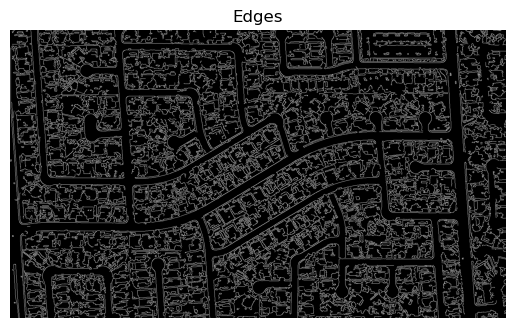

In [225]:
edges = cv2.Canny(blur, 100, 200)
display(edges, 'Edges')

Dilation adds pixels to the boundaries of objects in an image, while erosion removes pixels on object boundaries.

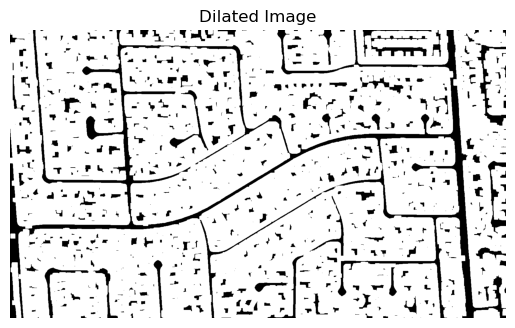

In [228]:
kernel = np.ones((13,13),np.uint8)
img_dilated = cv2.dilate(edges, kernel, iterations=1) 
display(img_dilated,'Dilated Image')

In [229]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
morph = cv2.morphologyEx(img_dilated, cv2.MORPH_CLOSE, kernel)

In [230]:
# img_eroded = cv2.erode(morph, kernel, iterations=1)
# display(img_eroded,'Eroded Image')

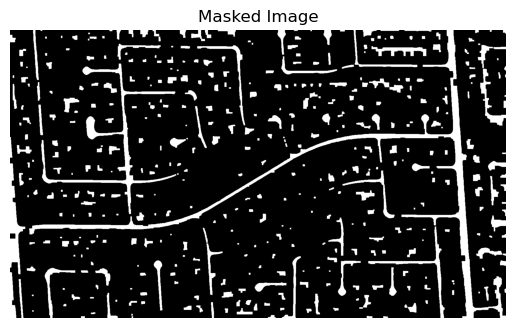

In [231]:
# mask = cv2.bitwise_not(img_eroded)
mask = cv2.bitwise_not(morph)
display(mask,'Masked Image')

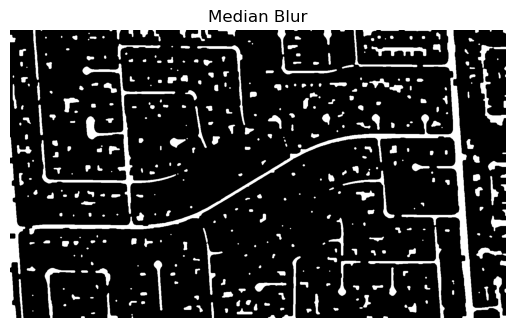

In [232]:
# Optional - Trying it out to see it's effect
denoised = cv2.medianBlur(mask, 5)
display(denoised,'Median Blur')

In [213]:
_, bin = cv2.threshold(denoised,100,200,0)
# _, bin = cv2.threshold(mask,150,200,0)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(bin, None, None, None, 8, cv2.CV_32S)
areas = stats[1:,cv2.CC_STAT_AREA]
result = np.zeros((labels.shape), np.uint8)
for i in range(0, nlabels - 1):
    if areas[i] >= 240:  
        result[labels == i + 1] = 255

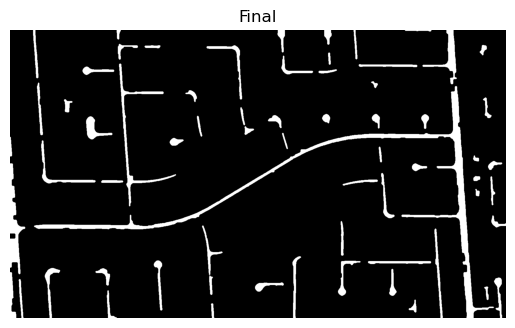

In [214]:
display(result,'Final')

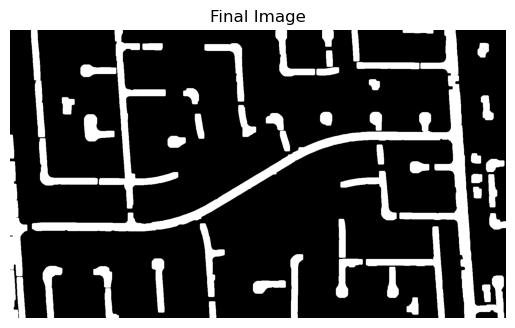

In [221]:
kernel = np.ones((5,5),np.uint8)
final = cv2.dilate(result, kernel, iterations=1) 
display(final,'Final Image')

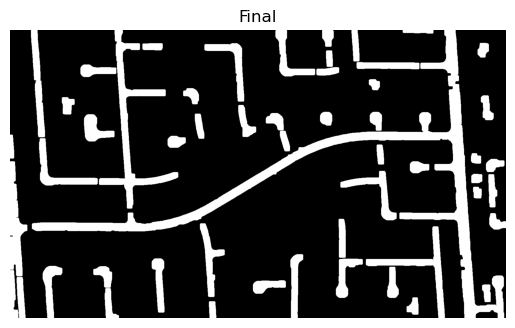

In [222]:
_, bin = cv2.threshold(final,100,200,0)
# _, bin = cv2.threshold(mask,150,200,0)

nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(bin, None, None, None, 8, cv2.CV_32S)
areas = stats[1:,cv2.CC_STAT_AREA]
result = np.zeros((labels.shape), np.uint8)
for i in range(0, nlabels - 1):
    if areas[i] >= 240:  
        result[labels == i + 1] = 255
        
display(result,'Final')

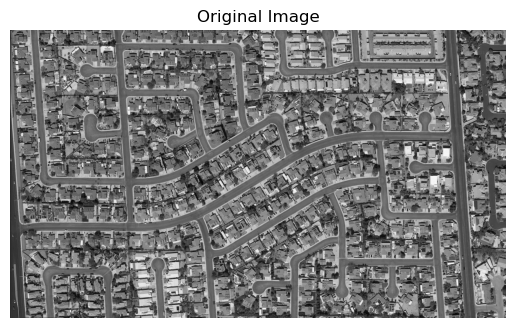

In [217]:
display(input_img, 'Original Image')

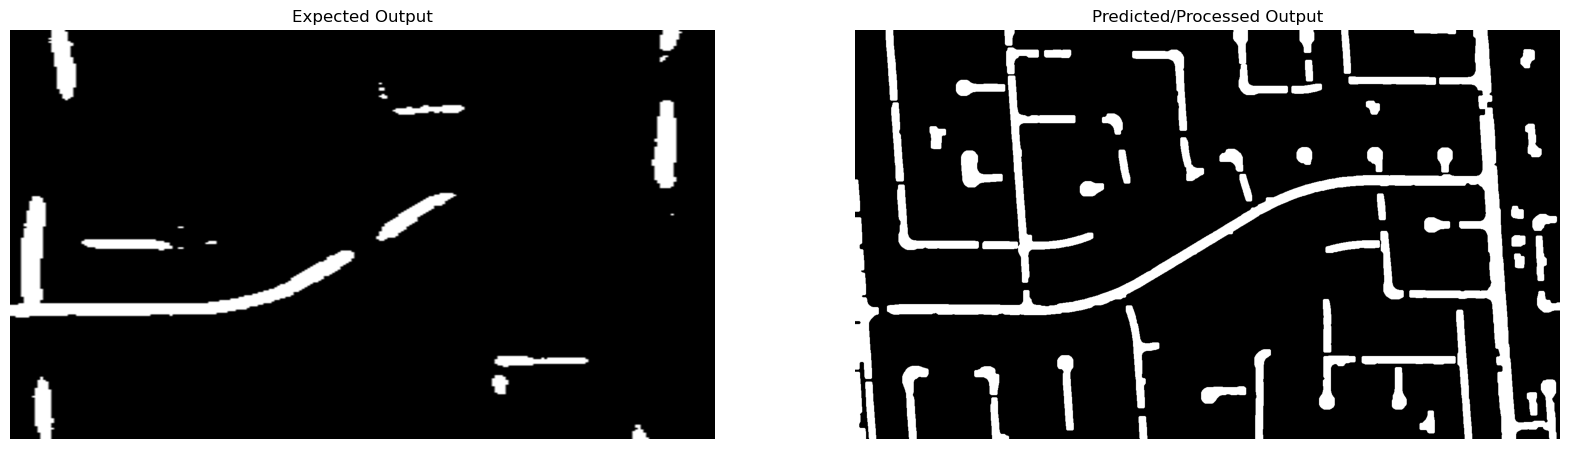

In [218]:
plt.figure(figsize=(20,10))

plt.subplot(121), display(output_img,'Expected Output')
plt.subplot(122), display(result,'Predicted/Processed Output')

plt.show()

`PSNR`

Peak Signal-to-Noise Ratio is an expression for the ratio of signal power to noise power

    PSNR = 10 log(R^2/ MSE)
    R = 255
    
Our aim is to minimize the MSE, which means **The higher the PSNR, the better the quality of the compressed, or reconstructed image**

In [117]:
def PSNR(original, distorted): 
    mse = np.mean((original - distorted)**2)
    if mse == 0: return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

In [125]:
PSNR(output_img, result)

45.110139077430944